In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Reshape
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [6]:
network_df = pd.read_csv('data/CICIDS-2017/Tuesday-WorkingHours.pcap_ISCX.csv')
network_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445909 entries, 0 to 445908
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             445909 non-null  int64  
 1    Flow Duration                445909 non-null  int64  
 2    Total Fwd Packets            445909 non-null  int64  
 3    Total Backward Packets       445909 non-null  int64  
 4   Total Length of Fwd Packets   445909 non-null  int64  
 5    Total Length of Bwd Packets  445909 non-null  int64  
 6    Fwd Packet Length Max        445909 non-null  int64  
 7    Fwd Packet Length Min        445909 non-null  int64  
 8    Fwd Packet Length Mean       445909 non-null  float64
 9    Fwd Packet Length Std        445909 non-null  float64
 10  Bwd Packet Length Max         445909 non-null  int64  
 11   Bwd Packet Length Min        445909 non-null  int64  
 12   Bwd Packet Length Mean       445909 non-nul

In [7]:
network_df[' Label'].unique()

array(['BENIGN', 'FTP-Patator', 'SSH-Patator'], dtype=object)

In [8]:
network_df.replace('BENIGN', 0, inplace=True)
network_df.replace('FTP-Patator', 1, inplace=True)
network_df.replace('SSH-Patator', 1, inplace=True)

In [10]:
# Clean Data
if(np.any(np.isnan(network_df)) or np.all(np.isfinite(network_df))):
    network_df.dropna(inplace=True)
    indices_to_keep = ~network_df.isin([np.nan, np.inf, -np.inf]).any(1)
    network_df = network_df[indices_to_keep]

network_df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,88,511,7,4,452,370,226,0,64.571429,110.276708,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [12]:
# Scale Data
scaled_features = MinMaxScaler().fit_transform(network_df.values)
network_df = pd.DataFrame(scaled_features, index=network_df.index, columns=network_df.columns)
network_df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.001343,0.000005,0.000029,0.000014,0.000181,5.709729e-07,0.008864,0.0,0.013454,0.019887,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.001343,0.000008,0.000039,0.000014,0.000247,4.695375e-06,0.012087,0.0,0.014269,0.024506,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.001343,0.000010,0.000029,0.000014,0.001143,4.513557e-06,0.055923,0.0,0.084883,0.125466,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.001343,0.000004,0.000029,0.000014,0.000186,5.901116e-07,0.009106,0.0,0.013821,0.020429,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.001343,0.000006,0.000039,0.000014,0.000252,4.695375e-06,0.012329,0.0,0.014555,0.024997,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
network_label = network_df.pop(' Label')
network_label.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name:  Label, dtype: float64

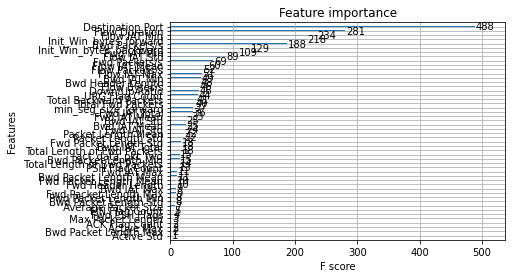

In [14]:
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance
import matplotlib.pyplot as plt

mod = xgb.XGBRegressor(objective ='reg:squarederror',max_depth = 5, n_estimators = 600)
mod.fit(network_df, network_label)
plot_importance(mod, max_num_features=50)
plt.show()

In [15]:
# Important Features
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regressor
reg = RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1)

# Train the regressor
reg.fit(network_df, network_label)

x = {}
# Print the name and gini importance of each feature
for feature in zip(list(network_df.columns), reg.feature_importances_):
    print(feature)
    x[feature[0]] = feature[1]

(' Destination Port', 0.7913485403428863)
(' Flow Duration', 6.680381247727618e-05)
(' Total Fwd Packets', 0.032931692759522006)
(' Total Backward Packets', 1.5720668494852483e-05)
('Total Length of Fwd Packets', 0.008680306575649291)
(' Total Length of Bwd Packets', 0.0)
(' Fwd Packet Length Max', 0.0005239482317650208)
(' Fwd Packet Length Min', 0.0)
(' Fwd Packet Length Mean', 1.165528601133462e-05)
(' Fwd Packet Length Std', 0.00012718220458762708)
('Bwd Packet Length Max', 0.0)
(' Bwd Packet Length Min', 1.9958469414889982e-05)
(' Bwd Packet Length Mean', 0.0)
(' Bwd Packet Length Std', 0.0)
('Flow Bytes/s', 4.791847819701099e-07)
(' Flow Packets/s', 0.00014983236489749357)
(' Flow IAT Mean', 5.265547222189067e-05)
(' Flow IAT Std', 1.2718096278821408e-05)
(' Flow IAT Max', 5.425766050917199e-05)
(' Flow IAT Min', 0.00019253428573246195)
('Fwd IAT Total', 4.471495121152202e-05)
(' Fwd IAT Mean', 5.217670158088329e-05)
(' Fwd IAT Std', 4.588729257101406e-06)
(' Fwd IAT Max', 4.7759

In [16]:
feat_imp = pd.DataFrame(list(x.items()),columns = ['feature','importance']).sort_values('importance')[::-1]

In [21]:
feat_imp = feat_imp.head(50)
feat_imp['feature']

0                Destination Port
67        Init_Win_bytes_backward
2               Total Fwd Packets
62            Subflow Fwd Packets
40             Packet Length Mean
52            Average Packet Size
63              Subflow Fwd Bytes
4     Total Length of Fwd Packets
68               act_data_pkt_fwd
37                  Bwd Packets/s
42         Packet Length Variance
41              Packet Length Std
24                    Fwd IAT Min
66         Init_Win_bytes_forward
6           Fwd Packet Length Max
30                  Fwd PSH Flags
44                 SYN Flag Count
19                   Flow IAT Min
39              Max Packet Length
15                 Flow Packets/s
36                  Fwd Packets/s
9           Fwd Packet Length Std
26                   Bwd IAT Mean
1                   Flow Duration
18                   Flow IAT Max
16                  Flow IAT Mean
21                   Fwd IAT Mean
23                    Fwd IAT Max
20                  Fwd IAT Total
25            

In [ ]:
network_features = feat_imp['feature']
network_features

0                Destination Port
67        Init_Win_bytes_backward
2               Total Fwd Packets
62            Subflow Fwd Packets
40             Packet Length Mean
52            Average Packet Size
63              Subflow Fwd Bytes
4     Total Length of Fwd Packets
68               act_data_pkt_fwd
37                  Bwd Packets/s
42         Packet Length Variance
41              Packet Length Std
24                    Fwd IAT Min
66         Init_Win_bytes_forward
6           Fwd Packet Length Max
30                  Fwd PSH Flags
44                 SYN Flag Count
19                   Flow IAT Min
39              Max Packet Length
15                 Flow Packets/s
36                  Fwd Packets/s
9           Fwd Packet Length Std
26                   Bwd IAT Mean
1                   Flow Duration
18                   Flow IAT Max
16                  Flow IAT Mean
21                   Fwd IAT Mean
23                    Fwd IAT Max
20                  Fwd IAT Total
25            

In [ ]:
network_df = network_df[network_features]
network_df = network_df.iloc[:648,:]
network_df

,Destination Port,Init_Win_bytes_backward,Total Fwd Packets,Subflow Fwd Packets,Packet Length Mean,Average Packet Size,Subflow Fwd Bytes,Total Length of Fwd Packets,act_data_pkt_fwd,Bwd Packets/s,...,Avg Fwd Segment Size,ACK Flag Count,Fwd IAT Std,Flow Bytes/s,Active Min,Idle Mean,Idle Max,Idle Min,Active Max,Active Mean
0,0.001343,0.031342,0.000029,0.000029,0.019927,0.018633,0.000181,0.000181,0.001083,3.125000e-03,...,0.013454,0.0,0.000002,0.000602,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.001343,0.031342,0.000039,0.000039,0.075856,0.070021,0.000247,0.000247,0.001083,2.222222e-03,...,0.014269,0.0,0.000003,0.001902,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.001343,0.031342,0.000029,0.000029,0.139990,0.130900,0.001143,0.001143,0.001083,1.659751e-03,...,0.084883,0.0,0.000005,0.002247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.001343,0.031342,0.000029,0.000029,0.020527,0.019194,0.000186,0.000186,0.001083,3.913894e-03,...,0.013821,0.0,0.000002,0.000777,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.001343,0.031342,0.000039,0.000039,0.076113,0.070258,0.000252,0.000252,0.001083,2.587322e-03,...,0.014555,0.0,0.000002,0.002222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,0.019556,0.000000,0.000005,0.000005,0.003696,0.004752,0.000015,0.000015,0.000542,0.000000e+00,...,0.003960,1.0,0.000000,0.000397,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
650,0.006763,0.652786,0.000010,0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,3.321884e-06,...,0.000000,0.0,0.000645,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
651,0.001221,0.445572,0.000010,0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,9.785113e-08,...,0.000000,0.0,0.042554,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
652,0.006763,1.000000,0.000053,0.000053,0.161596,0.144051,0.000968,0.000968,0.002167,1.181252e-06,...,0.041916,0.0,0.017812,0.000001,0.004448,0.041889,0.041889,0.041889,0.004448,0.004448


In [108]:
host_df = pd.read_csv('data/ftp_client5_to_server.csv')
host_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   No.                   648 non-null    int64  
 1   Time                  648 non-null    object 
 2   Source                648 non-null    object 
 3   Destination           648 non-null    object 
 4   Protocol              648 non-null    object 
 5   Length                648 non-null    int64  
 6   Command               648 non-null    object 
 7   Bitrate (Kbps)        648 non-null    int64  
 8   Bytes                 648 non-null    int64  
 9   Duration (ms)         648 non-null    int64  
 10  File_Size (s/m/l)     648 non-null    object 
 11  Working_Dir           648 non-null    int64  
 12  Request_Command       648 non-null    object 
 13  Response_Code         648 non-null    int64  
 14  User                  648 non-null    object 
 15  Pass                  6

In [3]:
host_df.shape

(648, 26)

In [109]:
host_df

,No.,Time,Source,Destination,Protocol,Length,Command,Bitrate (Kbps),Bytes,Duration (ms),...,Info,CPU (%),Sys_Load,Used_Memory,Virt_Memory,Failed_Logins,Disk_Reads (K),Disk_Writes (K),Incoming_Bits (Kbps),Outgoing_Bits (Kbps)
0,116363,08:02.0,192.168.10.5,192.168.10.50,FTP,68,-,0,0,0,...,Request: USER iscxtap,0.56,0.053,0.452,0.053,0,0,0.0,2.56,1.452
1,116369,08:02.0,192.168.10.5,192.168.10.50,FTP,65,-,0,0,0,...,Request: PASS 1234,0.59,0.034,0.420,0.034,0,0,0.0,2.59,1.420
2,116448,08:02.1,192.168.10.5,192.168.10.50,FTP,62,-,0,0,0,...,Request: TYPE I,0.56,0.053,0.531,0.053,0,0,0.0,2.56,1.531
3,116455,08:02.2,192.168.10.5,192.168.10.50,FTP,60,-,0,0,0,...,Request: PASV,0.59,0.043,0.532,0.043,0,0,0.0,2.59,1.532
4,116464,08:02.2,192.168.10.5,192.168.10.50,FTP,97,-,2500,9689,31,...,Request: STOR 45f67404faed487aa9ed637918307ea9...,0.46,0.053,0.531,0.053,0,0,77.5,2.46,1.531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,11012308,26:52.7,192.168.10.50,192.168.10.5,FTP,85,-,0,0,0,...,Response: 200 Switching to Binary mode.,0.49,0.028,0.532,0.028,0,0,0.0,2.49,1.532
644,11012315,26:52.7,192.168.10.50,192.168.10.5,FTP,105,STOR,0,0,0,...,"Response: 227 Entering Passive Mode (192,168,1...",0.60,0.053,0.424,0.053,0,0,0.0,2.60,1.424
645,11012329,26:52.7,192.168.10.50,192.168.10.5,FTP,76,-,0,0,0,...,Response: 150 Ok to send data.,0.49,0.053,0.561,0.053,0,0,0.0,2.49,1.561
646,11012463,26:52.8,192.168.10.50,192.168.10.5,FTP,78,-,0,0,0,...,Response: 226 Transfer complete.,0.46,0.043,0.613,0.043,0,0,0.0,2.46,1.613


In [110]:
host_meta = host_df[['No.', 'Time', 'Source', 'Destination', 'Protocol', 'Info']]
host_df.drop(columns=['No.', 'Time', 'Source', 'Destination', 'Protocol', 'Info'], inplace=True)
host_df

,Length,Command,Bitrate (Kbps),Bytes,Duration (ms),File_Size (s/m/l),Working_Dir,Request_Command,Response_Code,User,Pass,CPU (%),Sys_Load,Used_Memory,Virt_Memory,Failed_Logins,Disk_Reads (K),Disk_Writes (K),Incoming_Bits (Kbps),Outgoing_Bits (Kbps)
0,68,-,0,0,0,-,0,USER,0,iscxtap,1234,0.56,0.053,0.452,0.053,0,0,0.0,2.56,1.452
1,65,-,0,0,0,-,0,PASS,0,iscxtap,1234,0.59,0.034,0.420,0.034,0,0,0.0,2.59,1.420
2,62,-,0,0,0,-,0,TYPE,0,iscxtap,1234,0.56,0.053,0.531,0.053,0,0,0.0,2.56,1.531
3,60,-,0,0,0,-,0,PASV,0,iscxtap,1234,0.59,0.043,0.532,0.043,0,0,0.0,2.59,1.532
4,97,-,2500,9689,31,Small,0,STOR,0,iscxtap,1234,0.46,0.053,0.531,0.053,0,0,77.5,2.46,1.531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,85,-,0,0,0,-,0,-,200,iscxtap,1234,0.49,0.028,0.532,0.028,0,0,0.0,2.49,1.532
644,105,STOR,0,0,0,-,0,-,227,iscxtap,1234,0.60,0.053,0.424,0.053,0,0,0.0,2.60,1.424
645,76,-,0,0,0,-,0,-,150,iscxtap,1234,0.49,0.053,0.561,0.053,0,0,0.0,2.49,1.561
646,78,-,0,0,0,-,0,-,226,iscxtap,1234,0.46,0.043,0.613,0.043,0,0,0.0,2.46,1.613


In [111]:
cat_features = host_df.select_dtypes(include='object').columns
cat_features

Index(['Command', 'File_Size (s/m/l)', 'Request_Command', 'User'], dtype='object')

In [112]:
!pip install category_encoders

In [113]:
import category_encoders as ce
smoothing = 30

for col in cat_features:    
    te = ce.OrdinalEncoder()
    host_df[col] = te.fit_transform(host_df[col])

In [114]:
scaled = MinMaxScaler().fit_transform(host_df) 
host_df = pd.DataFrame(scaled, index=host_df.index, columns=host_df.columns)
host_df

,Length,Command,Bitrate (Kbps),Bytes,Duration (ms),File_Size (s/m/l),Working_Dir,Request_Command,Response_Code,User,Pass,CPU (%),Sys_Load,Used_Memory,Virt_Memory,Failed_Logins,Disk_Reads (K),Disk_Writes (K),Incoming_Bits (Kbps),Outgoing_Bits (Kbps)
0,0.173913,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.580645,1.00,0.654,1.00,0.0,0.0,0.000000,0.580645,0.654
1,0.108696,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.166667,0.000000,0.0,0.0,0.677419,0.24,0.590,0.24,0.0,0.0,0.000000,0.677419,0.590
2,0.043478,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.333333,0.000000,0.0,0.0,0.580645,1.00,0.812,1.00,0.0,0.0,0.000000,0.580645,0.812
3,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.500000,0.000000,0.0,0.0,0.677419,0.60,0.814,0.60,0.0,0.0,0.000000,0.677419,0.814
4,0.804348,0.0,0.16127,0.824315,0.688889,1.0,0.0,0.666667,0.000000,0.0,0.0,0.258065,1.00,0.812,1.00,0.0,0.0,0.824258,0.258065,0.812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,0.543478,0.0,0.00000,0.000000,0.000000,0.0,0.0,1.000000,0.604230,0.0,0.0,0.354839,0.00,0.814,0.00,0.0,0.0,0.000000,0.354839,0.814
644,0.978261,1.0,0.00000,0.000000,0.000000,0.0,0.0,1.000000,0.685801,0.0,0.0,0.709677,1.00,0.598,1.00,0.0,0.0,0.000000,0.709677,0.598
645,0.347826,0.0,0.00000,0.000000,0.000000,0.0,0.0,1.000000,0.453172,0.0,0.0,0.354839,1.00,0.872,1.00,0.0,0.0,0.000000,0.354839,0.872
646,0.391304,0.0,0.00000,0.000000,0.000000,0.0,0.0,1.000000,0.682779,0.0,0.0,0.258065,0.60,0.976,0.60,0.0,0.0,0.000000,0.258065,0.976


In [115]:
y_vx = host_df.values
y_vx.shape

(648, 20)

In [127]:
# Create training & testing datasets
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import KBinsDiscretizer

kf = KFold(n_splits=10)

discrete5 = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
discrete10 = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
discrete15 = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='uniform')
discrete20 = KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='uniform')
discrete25 = KBinsDiscretizer(n_bins=25, encode='ordinal', strategy='uniform')

mlp_bin_accuracy = {'5bins': 0, '10bins': 0, '15bins': 0, '20bins': 0, '25bins': 0}

In [147]:
model = Sequential()
model.add(Dense(50, activation="relu"))
model.add(Dropout(rate=0.3))
model.add(Dense(20, activation="relu"))
model.compile(optimizer='adam', loss='mse')

loss = []
for train, test in kf.split(network_df):
    X_train, X_test, y_train, y_test = np.array(network_df), np.array(network_df), np.array(y_vx), np.array(y_vx)
    Xbin_train = discrete25.fit_transform(X_train)
    Xbin_test = discrete25.fit_transform(X_test) 
    history = model.fit(Xbin_train[train], y_train[train])
    #accuracy = model.score(Xbin_test[test], y_test[test])
    loss = history.history['loss']
    #if(mlp_bin_accuracy['25bins'] > history['accuracy']):
    #    continue
    #else:
    #    mlp_bin_accuracy['25bins'] = history['accuracy']
    #print(f'train: {train},\n test: {test},\n layer size: {model.hidden_layer_sizes},\n Loss: {loss},\n Accuracy Score: {accuracy}\n Confusion Matrix:\n{confusion_matrix(y_test[test], model.predict(X_test[test]))}\n')

19/19 [==============================] - 0s 1ms/step - loss: 0.2942


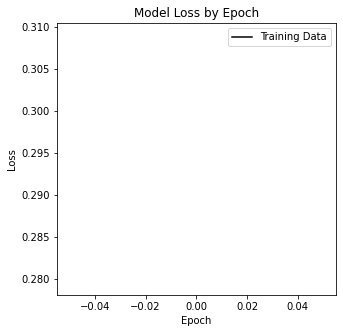

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a loss chart
fig, ax = plt.subplots(figsize=(5,5))
plt.title(label='Model Loss by Epoch', loc='center')

ax.plot(loss, label='Training Data', color='black')
#ax.plot(history.history['val_loss'], label='Test Data', color='red')
ax.set(xlabel='Epoch', ylabel='Loss')
plt.legend()

plt.show()

In [138]:
model2 = Sequential()
model2.add(Dense(50, activation="relu"))
model2.add(Dropout(rate=0.3))
model2.add(Dense(20, activation="relu"))
model2.compile(optimizer='adam', loss='mse')

X_train, X_test, y_train, y_test = train_test_split(network_df, y_vx)
history = model2.fit(X_train, y_train, epochs=1000)


Epoch 1/1000

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

16/16 [==============================] - 0s 1ms/step - loss: 0.2017
Epoch 2/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.1719
Epoch 3/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.1375
Epoch 4/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.1097

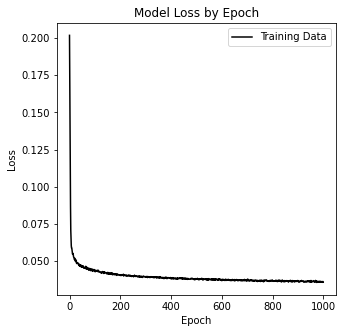

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a loss chart
fig, ax = plt.subplots(figsize=(5,5))
plt.title(label='Model Loss by Epoch', loc='center')

ax.plot(history.history['loss'], label='Training Data', color='black')
#ax.plot(history.history['val_loss'], label='Test Data', color='red')
ax.set(xlabel='Epoch', ylabel='Loss')
plt.legend()

plt.show()

[[1.34340890e-03 3.13415527e-02 2.90634309e-05 2.90634309e-05
  1.99272260e-02 1.86332503e-02 1.81188141e-04 1.81188141e-04
  1.08342362e-03 3.12500000e-03 6.75956113e-04 2.59720884e-02
  8.33333333e-09 1.25015259e-01 8.86381950e-03 0.00000000e+00
  0.00000000e+00 1.16666654e-07 8.86381950e-03 4.03437500e-01
  3.64583333e-03 1.98865458e-02 1.49444444e-06 5.36666752e-06
  3.74166654e-06 5.66666648e-07 8.88888889e-07 4.14166667e-06
  5.33333333e-06 4.48333333e-06 3.33333333e-08 3.67658888e-06
  0.00000000e+00 0.00000000e+00 1.44889739e-05 1.44889739e-05
  4.41666667e-06 1.59855290e-06 0.00000000e+00 1.34540117e-02
  1.34540117e-02 0.00000000e+00 2.30243077e-06 6.02355072e-04
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
(1, 20)


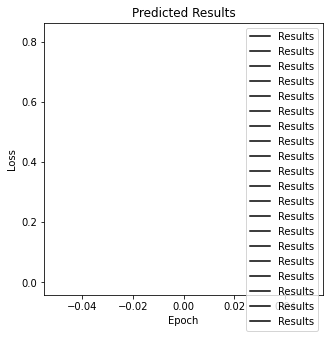

In [177]:
import numpy as np
from sklearn.decomposition import PCA

print(X_test[0, :].reshape(1, 50))
results = model2.predict(X_test[0, :].reshape(1, 50))

print(results.shape)
#pca = PCA(n_components=3)
#pca.fit(results)

# Plot a loss chart
fig, ax = plt.subplots(figsize=(5,5))
plt.title(label='Predicted Results', loc='center')

ax.plot(results, label='Results', color='black')
#ax.plot(history.history['val_loss'], label='Test Data', color='red')
ax.set(xlabel='Epoch', ylabel='Loss')
plt.legend()

plt.show()
